<a href="https://colab.research.google.com/github/Senai538/Car-Price-Prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [340]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")

In [341]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [342]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [343]:
df.shape

(205, 26)

In [344]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [346]:
CarModel = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CarModel",CarModel)
df.drop(['CarName'],axis=1,inplace=True)
df.CarModel.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [347]:
df.CarModel = df.CarModel.str.lower()

def replace_name(a,b) :
  df.CarModel.replace(a,b,inplace=True)


replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CarModel.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [348]:
miss_val=df.isna().sum()
miss_val

car_ID              0
symboling           0
CarModel            0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [349]:
df.describe(include=object)

,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


In [350]:
cor=df.corr()['price'].sort_values()
cor

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

This shows you which columns have the most correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


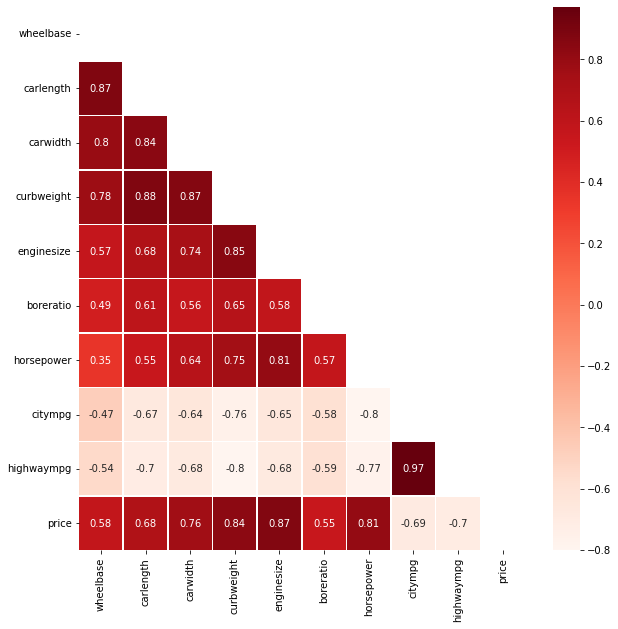

In [351]:
df=df.drop(columns=['car_ID','peakrpm','symboling','compressionratio','stroke','carheight'])

fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr(),dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

In [352]:
from sklearn.preprocessing import LabelEncoder

In [353]:
df_categoric_features=df.select_dtypes(object).columns.tolist()
len(df_categoric_features)

10

In [354]:
le = LabelEncoder()
df[df_categoric_features] =df[df_categoric_features].astype('str').apply(le.fit_transform)
df

,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,0,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,13495.0
1,0,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,16500.0
2,0,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,19,26,16500.0
3,1,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,24,30,13950.0
4,1,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,0,3,2,0,109.1,188.8,68.9,2952,3,2,141,5,3.78,114,23,28,16845.0
201,21,1,1,0,3,2,0,109.1,188.8,68.8,3049,3,2,141,5,3.78,160,19,25,19045.0
202,21,1,0,0,3,2,0,109.1,188.8,68.9,3012,5,3,173,5,3.58,134,18,23,21485.0
203,21,0,1,0,3,2,0,109.1,188.8,68.9,3217,3,3,145,3,3.01,106,26,27,22470.0


In [355]:
df.drop('highwaympg',inplace=True,axis=1)
df

,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,price
0,0,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,13495.0
1,0,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,16500.0
2,0,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,19,16500.0
3,1,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,24,13950.0
4,1,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,0,3,2,0,109.1,188.8,68.9,2952,3,2,141,5,3.78,114,23,16845.0
201,21,1,1,0,3,2,0,109.1,188.8,68.8,3049,3,2,141,5,3.78,160,19,19045.0
202,21,1,0,0,3,2,0,109.1,188.8,68.9,3012,5,3,173,5,3.58,134,18,21485.0
203,21,0,1,0,3,2,0,109.1,188.8,68.9,3217,3,3,145,3,3.01,106,26,22470.0


In [356]:
y=df['price']

In [357]:
x = df.drop(['price'], axis = 1)

In [358]:
from sklearn.preprocessing import StandardScaler

#fitting the model to standardlize the data
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [359]:
scaled_x = scaler.transform(x)

In [360]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state = 5)


In [361]:
print('Dimension of x_train dataframe:',x_train.shape)
print('Dimension of y_train dataframe:',y_train.shape)
print('Dimension of x_test dataframe:',x_test.shape)
print('Dimension of y_test dataframe:',y_test.shape)

Dimension of x_train dataframe: (164, 18)
Dimension of y_train dataframe: (164,)
Dimension of x_test dataframe: (41, 18)
Dimension of y_test dataframe: (41,)


In [362]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(x_train,y_train)

LinearRegression()

In [363]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(x_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(y_test, df_pred))
print('Mean Square Error of linear regression:', mean_squared_error(y_test, df_pred, ))
print('R_Squared Score of linear regression:', r2_score(y_test, df_pred))

Mean Absolute Error of linear regression: 1777.1109090385194
Mean Square Error of linear regression: 5853342.290171225
R_Squared Score of linear regression: 0.9143178301751567


I got a 91% accuracy 